# Lab 10: Wednesday, June 9

The last lab will be next Monday, June 14. 
There will be no lab on the day of the final exam.

Today's lab and the last will be review.
If you have any topics you'd like to see covered in Monday's lab, let me know via email, [cummim5@mcmaster.ca](mailto:cummim5@mcmaster.ca).

## Questions?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Square Average

This is modified from question 103 from Lovric's problems.

Write a function which returns the average of the squares of the numbers between `a` and `b` (inclusive).
So if $a=3$ and $b=6$, we'd return the average $\frac{3^2 + 4^2 + 5^2 + 6^2}{4}$.
You may assume that $a \le b$.

In [2]:
def square_average_loops(a, b):
    ns_squared = []
    for n in range(a, b+1):
        ns_squared.append(n**2)
        
    average = sum(ns_squared)/len(ns_squared)
    return average

In [3]:
print(square_average_loops(3, 6))  # 21.5
print(square_average_loops(1, 100))  # 3383.5
print(square_average_loops(1, 1))  # 1.0
print(square_average_loops(-5, 5))  # 10.0

21.5
3383.5
1.0
10.0


In [4]:
def square_average(a, b):
    ns_squared = [i**2 for i in range(a, b+1)]
    average = sum(ns_squared)/len(ns_squared)
    return average

In [5]:
print(square_average(3, 6))  # 21.5
print(square_average(1, 100))  # 3383.5
print(square_average(1, 1))  # 1.0
print(square_average(-5, 5))  # 10.0

21.5
3383.5
1.0
10.0


## 2. Pseudo-random Numbers

This is question 117 from Lovric's problems.

Computers (and humans) are not good at generating truly random numbers.
Instead, computers will create a sequence of _pseudorandom_ numbers using a formula such as $$x_{n+1} = (ax_n + c) \mod m,$$ where $a, m > 0$, and $0 \le c, x_0 < m$.

Write a function which takes these parameters, `a`, `m`, `c`, and `x0`, as well as a positive integer `t`.
Return a list of the first `t` terms generated by this sequence.

In [6]:
def pseudo_rand(a, m, c, x0, t):
    seq = [x0]
    
    for n in range(1,t):
        next_term = (a*seq[-1] + c) % m
        seq.append(next_term)

    return seq

In [7]:
print(pseudo_rand(2, 15, 3, 13, 10))  # [13, 14, 1, 5, 13, 14, 1, 5, 13, 14]

[13, 14, 1, 5, 13, 14, 1, 5, 13, 14]


Now, write another function `count_unique` which takes the same parameters as the previous function. 
This function should call `pseudo_rand` to get the sequence of numbers with the given parameters.
Then, `count_unique` should return the number of unique numbers in this list.

In [8]:
def count_unique(a, m, c, x0, t):
    rand_seq = pseudo_rand(a, m, c, x0, t)
    return len(set(rand_seq))

In [9]:
print(count_unique(2, 15, 3, 13, 10))  # 4
print(count_unique(7**5, (2**31)-1, 0, 1, int(1e7)))  # 10000000

4
10000000


## 3. Sub-list in range

Write a function which takes a list `num_list` and returns a new list containing the first `n` digits from `num_list` above the lower bound `low` (but not including `low`). 
If there are no such numbers, return the empty list.
You may assume that $n \ge 1$.

In [10]:
def sublist_loops(num_list, n, low):
    greater_than = []
    
    for num in num_list:
        if num > low:
            greater_than.append(num)
            
        if len(greater_than) == n:
            break
            
    return greater_than

In [11]:
print(sublist_loops([3, 4, 5, 6, 7], 2, 4))  # [5, 6]
print(sublist_loops([0, 1, -1, 2, -2, 3, -3], 3, 0))  # [1, 2, 3]

[5, 6]
[1, 2, 3]


In [12]:
def sublist(num_list, n, low):
    greater_than = [num for num in num_list if num > low]
    return greater_than[:n]

In [13]:
print(sublist([3, 4, 5, 6, 7], 2, 4))  # [5, 6]
print(sublist([0, 1, -1, 2, -2, 3, -3], 3, 0))  # [1, 2, 3]

[5, 6]
[1, 2, 3]


## 4. Grading Multiple Choice

Suppose that the solutions and students answers to a multiple choice test are stored in text files (one for the solutions, and one for each student).
Write a function `grade_test(solution_file, student_file)` which takes the `solution_file` and `student_file` locations as parameters.
The function should open and read these files, and return the student's score (as a percent, represented as a number between 0 and 1).

You may assume that the solution file and the student's file will be of the same length.

In [14]:
def grade_test_v1(solution_file, student_file):
    # using regular python
    with open(solution_file, 'r') as sol:
        solutions = [line.strip() for line in sol.readlines()]
        
    with open(student_file, 'r') as ans:
        student = [line.strip() for line in ans.readlines()]
        
    num_correct = 0
    for i in range(len(solutions)):
        num_correct += (solutions[i] == student[i])  # adds 1 if the same, adds 0 if different
        # alternatively: if solutions[i] == student[i]: num_correct += 1
        
    return num_correct/len(solutions)

In [15]:
print(grade_test_v1('Assets/solutions.txt', 'Assets/student1.txt'))  # 0.225
print(grade_test_v1('Assets/solutions.txt', 'Assets/student2.txt'))  # 1.0
print(grade_test_v1('Assets/solutions.txt', 'Assets/student3.txt'))  # 0.725

0.225
1.0
0.725


In [16]:
def grade_test(solution_file, student_file):
    
    # using numpy
    with open(solution_file, 'r') as sol:
        solutions = np.array([line.strip() for line in sol.readlines()])
        
    with open(student_file, 'r') as ans:
        student = np.array([line.strip() for line in ans.readlines()])
        
    num_correct = np.sum(solutions == student)
    return num_correct/len(solutions)

In [17]:
print(grade_test('Assets/solutions.txt', 'Assets/student1.txt'))  # 0.225
print(grade_test('Assets/solutions.txt', 'Assets/student2.txt'))  # 1.0
print(grade_test('Assets/solutions.txt', 'Assets/student3.txt'))  # 0.725

0.225
1.0
0.725


## 5. Piecewise Plotting

Using `matplotlib` (which was imported above as `plt`), plot the following piecewise function on the interval.
$$
f(x) = \begin{cases}
f_1(x) = xe^{-x/3}-1 & -1 \le x < 1 \\
f_2(x) = e^{-x/10}\, \sin{(2\pi x)} & 1 \le x < 8 \\
f_3(x) = (x-8)^3 - 5 & 8 \le x \le 10
\end{cases}
$$

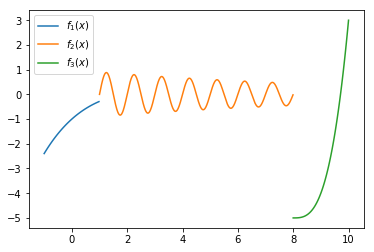

In [18]:
x_1 = np.linspace(-1, 1, 100, endpoint=False)
y_1 = x_1 * np.exp((-x_1)/3) - 1
plt.plot(x_1, y_1, label='$f_1(x)$')

x_2 = np.linspace(1, 8, 1000, endpoint=False)
y_2 = np.exp((-x_2)/10) * np.sin(2 * np.pi * x_2)
plt.plot(x_2, y_2, label='$f_2(x)$')

x_3 = np.linspace(8, 10, 100)  # endpoint = True by default
y_3 = (x_3 - 8)**3 - 5
plt.plot(x_3, y_3, label='$f_3(x)$')

plt.legend()
plt.show()

## 6. Dividing Itself

This is a [coding bat problem](https://codingbat.com/prob/p165941) from their Java problemset.

We'll say a number _divides itself_ if every digit of the number divides the number. 
For example, 128 divides itself as 1, 2, and 8 all divide 128.
For a nonexample, consider 27: neither 2 nor 7 divides 27.

Write a function `is_self_divisible(n)` which returns `True` if `n` divides itself, and `False` otherwise.
You may assume that `n` is positive.

In [19]:
def is_self_divisible(n):
    
    remaining_number = n
    while remaining_number >= 10:
        last_digit = remaining_number % 10
        
        if n % last_digit != 0:
            return False
        else:
            remaining_number //= 10
            
    return n % remaining_number == 0

In [20]:
print(is_self_divisible(128))  # True
print(is_self_divisible(27))  # False
print(is_self_divisible(45))  # False

True
False
False
